#Импорт библиотек

In [ ]:

import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as prepro
from sklearn.ensemble import ExtraTreesClassifier

#Мат.характеристики

In [ ]:
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data", header=None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       214 non-null    int64  
 1   1       214 non-null    float64
 2   2       214 non-null    float64
 3   3       214 non-null    float64
 4   4       214 non-null    float64
 5   5       214 non-null    float64
 6   6       214 non-null    float64
 7   7       214 non-null    float64
 8   8       214 non-null    float64
 9   9       214 non-null    float64
 10  10      214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [ ]:
names=["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "class"]
data.columns=names
data=data.drop(columns=['Id'])
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
data['class'].replace({1:"building_float", 2:"boilding_not_float", 3:"vehicle_float", 4:"vehicle_non_float", 5:"containers", 6:"tableware", 7:"headlamps"}, inplace=True)
data['class'].value_counts()

boilding_not_float    76
building_float        70
headlamps             29
vehicle_float         17
containers            13
tableware              9
Name: class, dtype: int64

In [ ]:
for col in data.columns:
  fr=np.random.randint(5,10)/100
  data.loc[data.sample(frac=fr).index, col]=np.nan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      195 non-null    float64
 1   Na      197 non-null    float64
 2   Mg      201 non-null    float64
 3   Al      197 non-null    float64
 4   Si      195 non-null    float64
 5   K       203 non-null    float64
 6   Ca      199 non-null    float64
 7   Ba      195 non-null    float64
 8   Fe      197 non-null    float64
 9   class   203 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


#Vizualization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      195 non-null    float64
 1   Na      197 non-null    float64
 2   Mg      201 non-null    float64
 3   Al      197 non-null    float64
 4   Si      195 non-null    float64
 5   K       203 non-null    float64
 6   Ca      199 non-null    float64
 7   Ba      195 non-null    float64
 8   Fe      197 non-null    float64
 9   class   203 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,195.000000,197.000000,201.000000,197.000000,195.000000,203.000000,199.000000,195.000000,197.000000
mean,1.518449,13.409492,2.689652,1.462843,72.645744,0.497635,8.950804,0.175949,0.057817
std,0.003119,0.827489,1.441825,0.502344,0.797706,0.666569,1.431833,0.501190,0.098498
min,1.511150,10.730000,0.000000,0.340000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516525,12.930000,2.090000,1.190000,72.255000,0.120000,8.240000,0.000000,0.000000
50%,1.517760,13.310000,3.480000,1.360000,72.790000,0.550000,8.600000,0.000000,0.000000
75%,1.519355,13.830000,3.610000,1.650000,73.100000,0.605000,9.145000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [ ]:
data["class"].describe()

count                    203
unique                     6
top       boilding_not_float
freq                      73
Name: class, dtype: object

In [ ]:
data["class"].value_counts()

boilding_not_float    73
building_float        67
headlamps             29
vehicle_float         16
containers            11
tableware              7
Name: class, dtype: int64

In [ ]:
display(data["class"].describe())
display(print("===================================="))
display(data['class'].value_counts())

count                    203
unique                     6
top       boilding_not_float
freq                      73
Name: class, dtype: object

None

boilding_not_float    73
building_float        67
headlamps             29
vehicle_float         16
containers            11
tableware              7
Name: class, dtype: int64

In [ ]:
for col in data.columns:
  missing_values_counts=data[col].isna().sum()
  percentage=100*missing_values_counts/len(data[col])
  print("Column", col, "contains", missing_values_counts, "NULL values (", percentage, "%).")

Column RI contains 19 NULL values ( 8.878504672897197 %).
Column Na contains 17 NULL values ( 7.94392523364486 %).
Column Mg contains 13 NULL values ( 6.074766355140187 %).
Column Al contains 17 NULL values ( 7.94392523364486 %).
Column Si contains 19 NULL values ( 8.878504672897197 %).
Column K contains 11 NULL values ( 5.140186915887851 %).
Column Ca contains 15 NULL values ( 7.009345794392523 %).
Column Ba contains 19 NULL values ( 8.878504672897197 %).
Column Fe contains 17 NULL values ( 7.94392523364486 %).
Column class contains 11 NULL values ( 5.140186915887851 %).


#Гистограммы

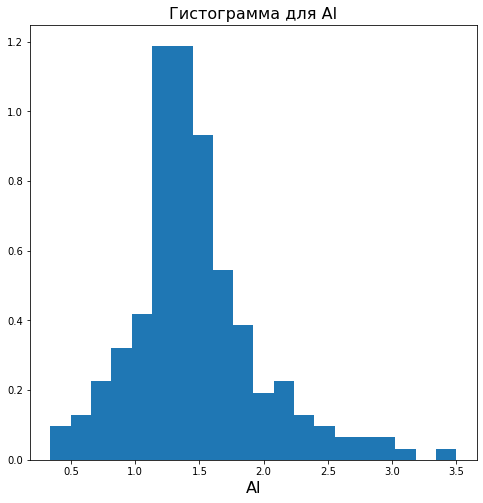

In [ ]:
col='Al'
fig, ax=plt.subplots(figsize=(8,8))
ax.hist(data[col], density=True, bins=20)
ax.set_xlabel(col, fontsize=16)
ax.set_title("Гистограмма для "+ str(col), fontsize=16)
plt.show()

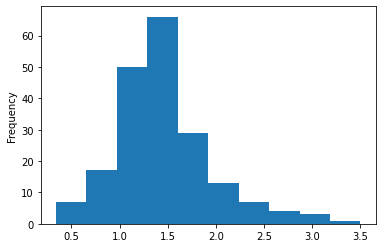

In [ ]:
data['Al'].plot(kind='hist')

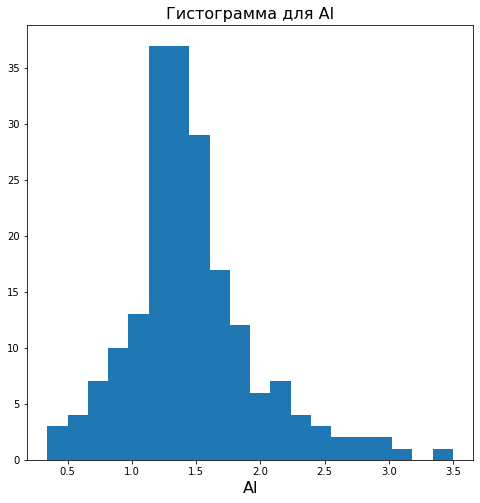

In [ ]:
ax=data['Al'].plot(kind='hist', bins=20, figsize=(8,8))
ax.set_xlabel('Al', fontsize=16)
ax.set_ylabel(None)
ax.set_title('Гистограмма для '+ str('Al'), fontsize=16)
plt.show()

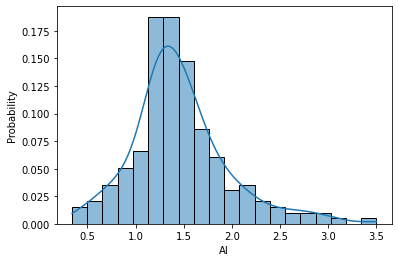

In [ ]:
sns.histplot(data=data, x="Al", bins=20, kde=True, stat='probability')

#Barplot

In [ ]:
df1=data['class'].value_counts()
df1

boilding_not_float    73
building_float        67
headlamps             29
vehicle_float         16
containers            11
tableware              7
Name: class, dtype: int64

In [ ]:
df1.index.values


array(['boilding_not_float', 'building_float', 'headlamps',
       'vehicle_float', 'containers', 'tableware'], dtype=object)

In [ ]:
df1.values

array([73, 67, 29, 16, 11,  7])

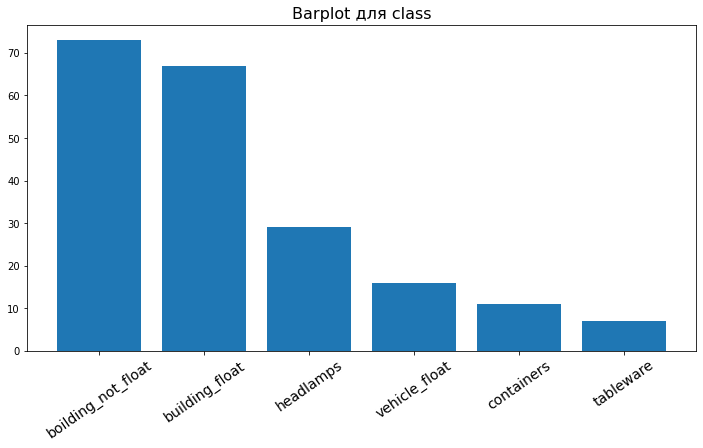

In [ ]:
col='class'
fig, ax=plt.subplots(figsize=(12,6))
ax.bar(data['class'].value_counts().index.values, data['class'].value_counts().values)
ax.set_xlabel(None, fontsize=16)
ax.set_title("Barplot для "+ str(col), fontsize=16)
ax.tick_params(axis='x', which='major', labelsize=14, rotation=35)
plt.show()

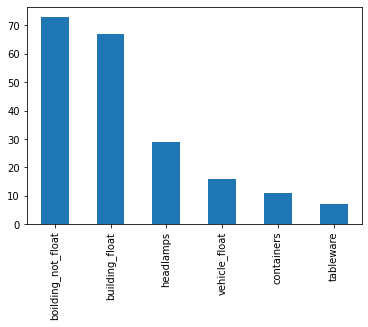

In [ ]:
data['class'].value_counts().plot(kind='bar')

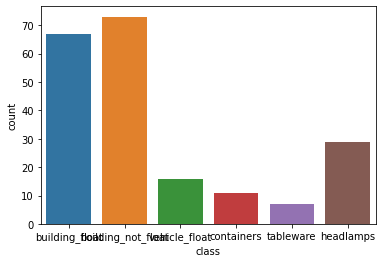

In [ ]:
sns.countplot(x="class", data=data)

#Boxplot

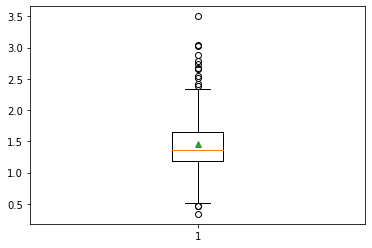

In [ ]:
fig, ax =plt.subplots()
col='Al'
ax.boxplot(data[col][~np.isnan(data[col])], showmeans=True)
plt.show()

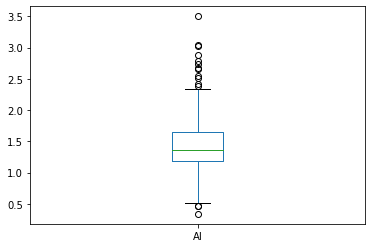

In [ ]:
data[col].plot(kind='box')
plt.show()

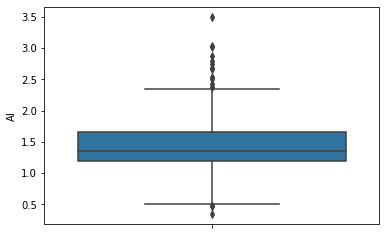

In [ ]:
sns.boxplot(data=data, y='Al')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


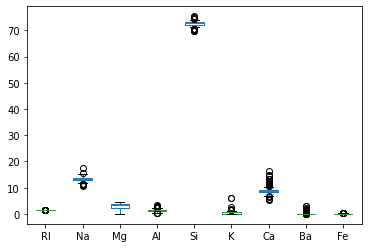

In [ ]:
data.plot(kind='box')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


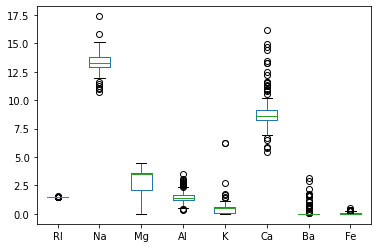

In [ ]:
data[ data.columns.values[data.columns.values!='Si'] ].plot(kind='box')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


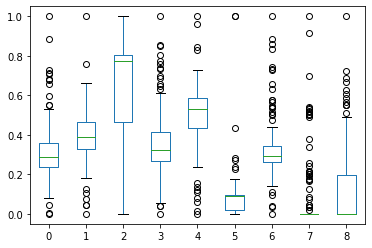

In [ ]:
scaler1 = prepro.MinMaxScaler()
data1 = scaler1.fit_transform(data[data.columns.values[data.columns.values!='class']])
data1 = pd.DataFrame(data1)
data1.plot(kind='box')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


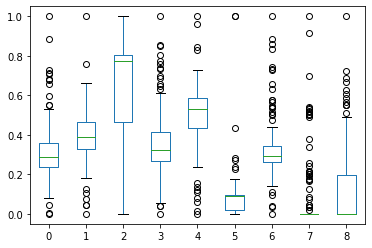

In [ ]:
scaler2 = prepro.StandardScaler()
data2 = scaler1.fit_transform(data[data.columns.values[data.columns.values!='class']])
data2 = pd.DataFrame(data2)
data2.plot(kind='box') 
plt.show()

#Диаграммы рассеивания

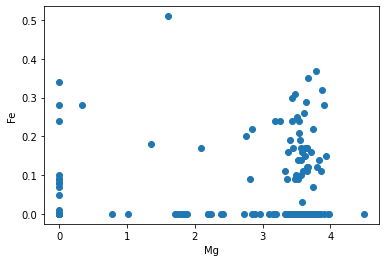

In [ ]:
col1='Mg'
col2='Fe'
fig, ax = plt.subplots()

ax.scatter(data[col1], data[col2])
ax.set_xlabel(col1)
ax.set_ylabel(col2)

plt.show()

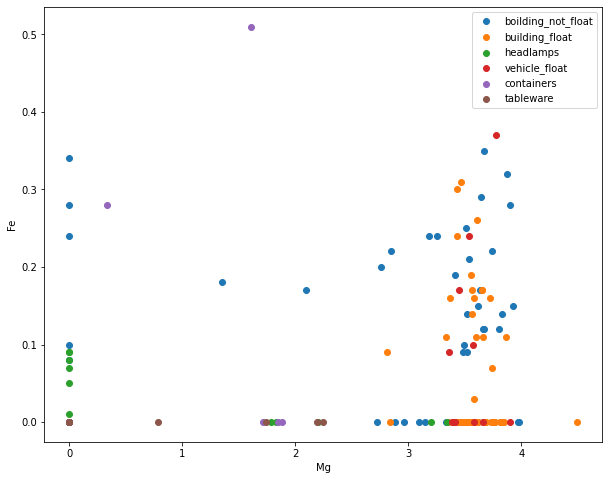

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

for glassType in data['class'].value_counts().index.values:
  ax.scatter(data[col1][data['class']==glassType], data[col2][data['class']==glassType], label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


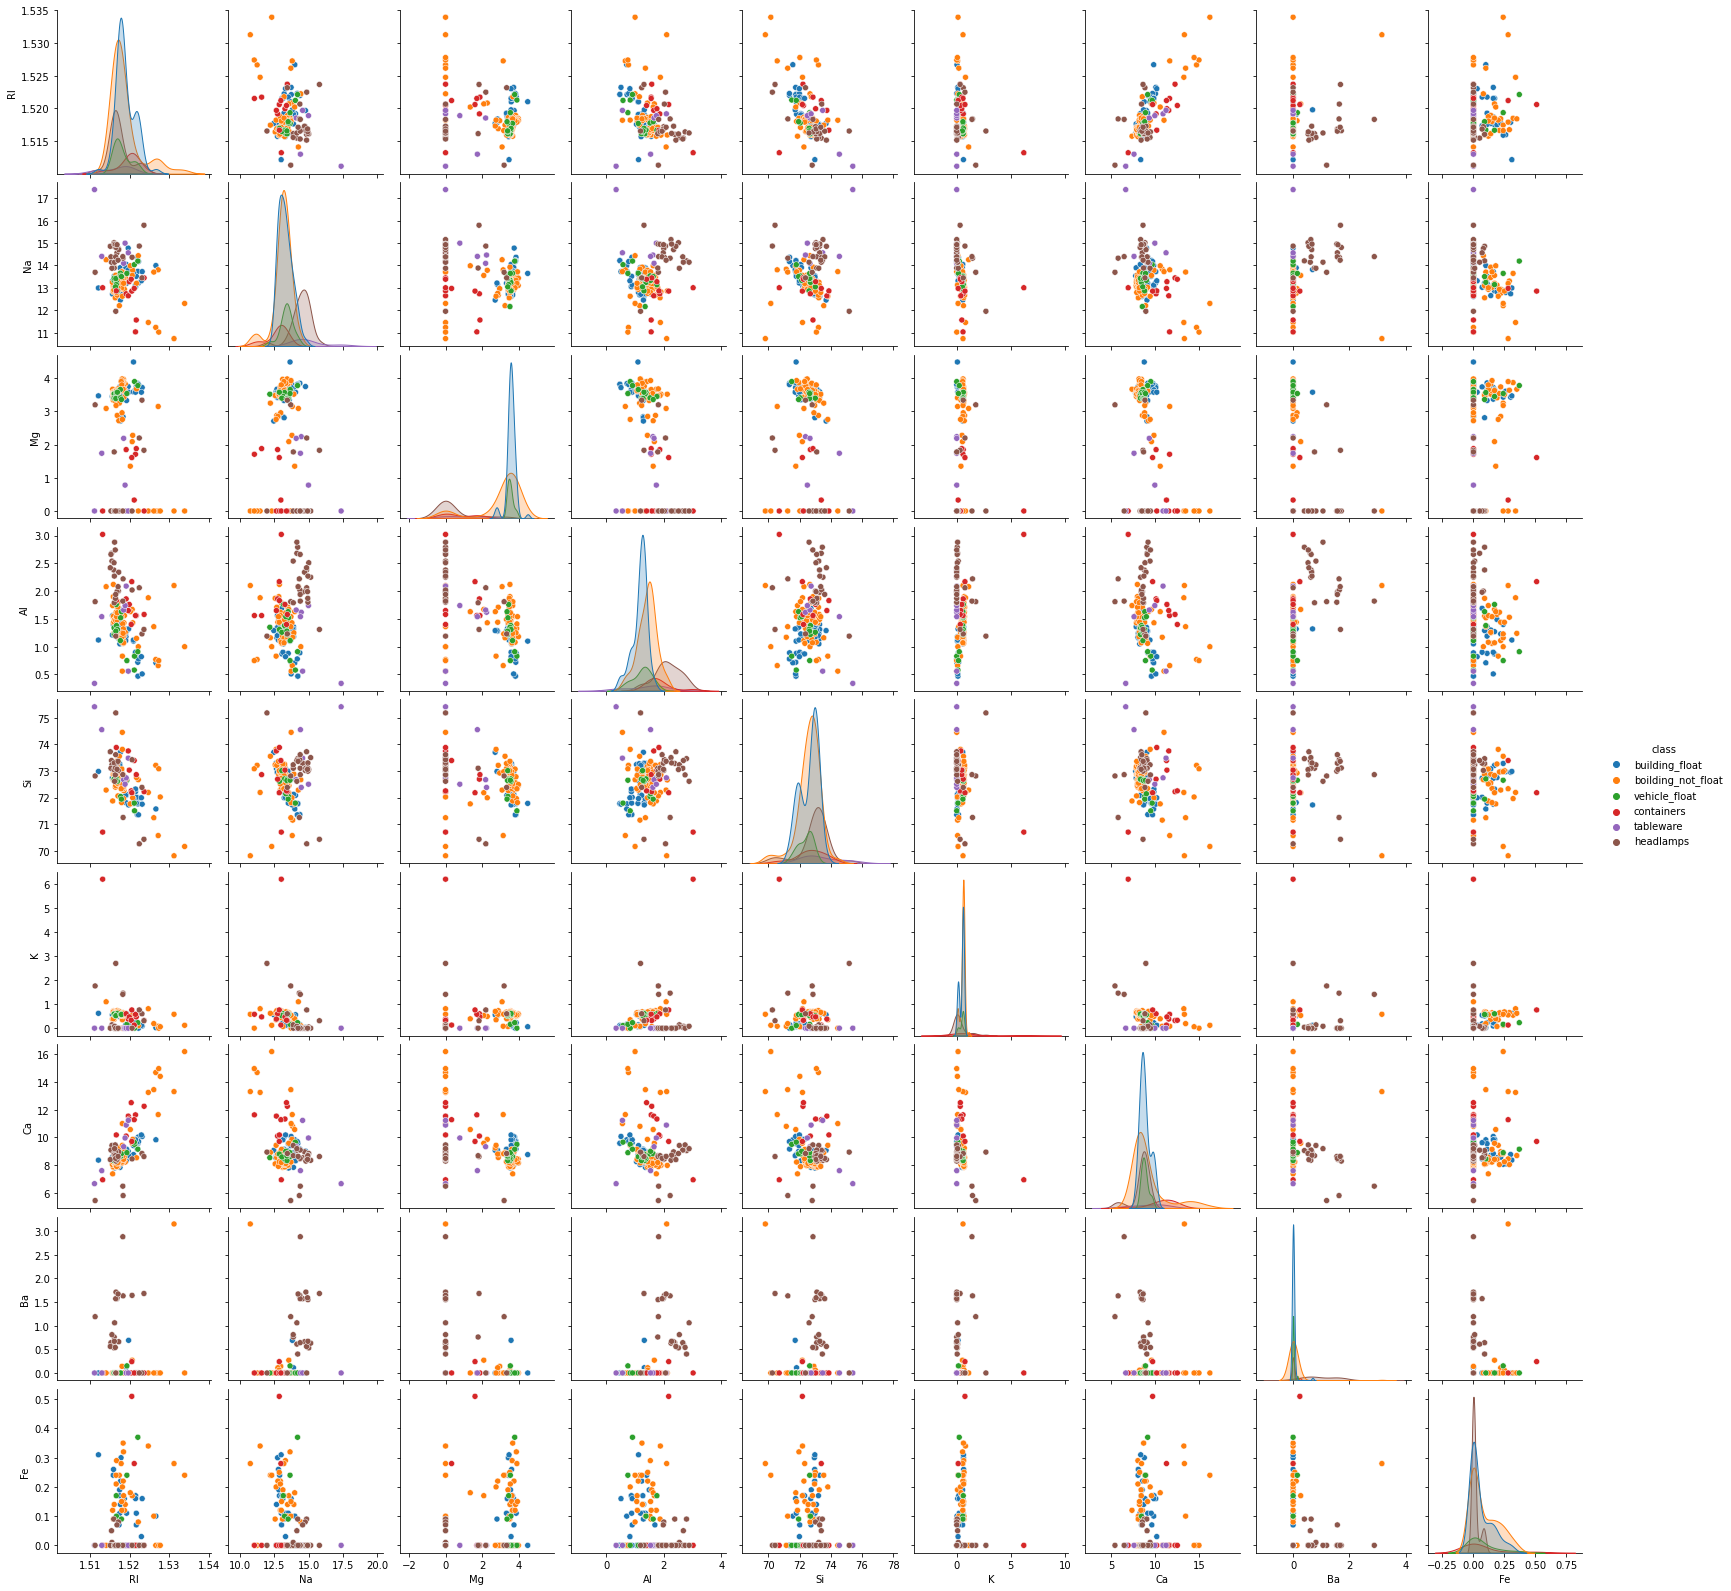

In [ ]:
sns.pairplot(data=data, hue='class')
plt.show()

#Самостоятельное задание 3

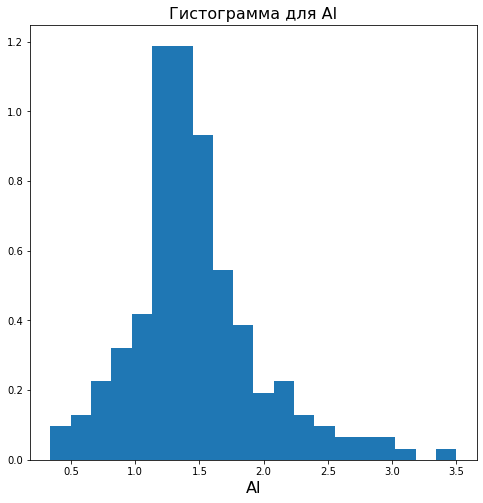

In [ ]:
#@title Гистограмма или столбчатая
peremenay='Al'#@param ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","class"]
if peremenay!='class':
  col=peremenay
  fig, ax=plt.subplots(figsize=(8,8))
  ax.hist(data[col], density=True, bins=20)
  ax.set_xlabel(col, fontsize=16)
  ax.set_title("Гистограмма для "+ str(col), fontsize=16)
  plt.show()
else:
  col='class'
  fig, ax=plt.subplots(figsize=(12,6))
  ax.bar(data['class'].value_counts().index.values, data['class'].value_counts().values)
  ax.set_xlabel(None, fontsize=16)
  ax.set_title("Barplot для "+ str(col), fontsize=16)
  ax.tick_params(axis='x', which='major', labelsize=14, rotation=35)
  plt.show()


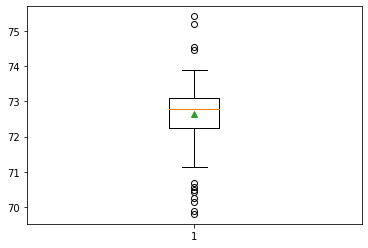

In [ ]:
#@title Ящик с усами
peremen='Si'#@param ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]
fig, ax =plt.subplots()
col=peremen
ax.boxplot(data[col][~np.isnan(data[col])], showmeans=True)
plt.show()

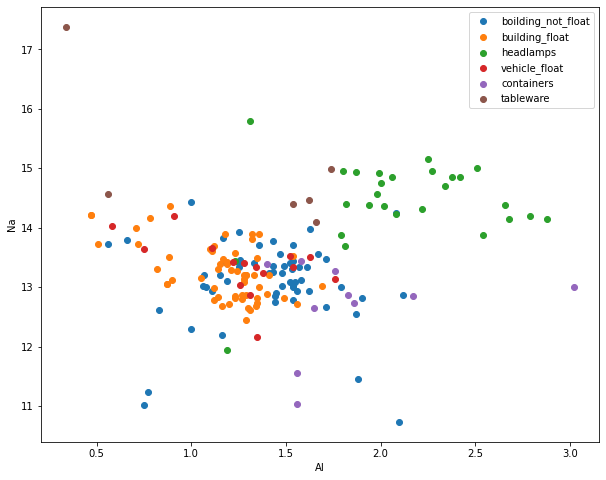

In [ ]:
#@title Парный график
x='Al'#@param ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]
y='Na'#@param ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]
fig, ax = plt.subplots(figsize=(10,8))

for glassType in data['class'].value_counts().index.values:
  ax.scatter(data[x][data['class']==glassType], data[y][data['class']==glassType], label=glassType)

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.legend()

plt.show()

#NaN

In [ ]:
data.mean()

RI     1.518449
Na    13.409492
Mg     2.689652
Al     1.462843
Si    72.645744
K      0.497635
Ca     8.950804
Ba     0.175949
Fe     0.057817
dtype: float64

In [ ]:
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   class   203 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
data_fillna_mean['class'].value_counts().index[0]

'boilding_not_float'

In [ ]:
data_fillna_mean['class'].mode()

0    boilding_not_float
dtype: object

In [ ]:
data_fillna_mean['class'].fillna(data_fillna_mean['class'].value_counts().index[0],
                                 inplace=True)
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


#PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit( data_fillna_mean[data_fillna_mean.columns.values
                          [data_fillna_mean.columns.values != 'class']] )

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.explained_variance_ratio_*100)

[4.62930556e+01 2.62323898e+01 1.09719444e+01 1.02925558e+01
 3.50250267e+00 1.73328888e+00 8.35414022e-01 1.38822488e-01
 2.64153095e-05]


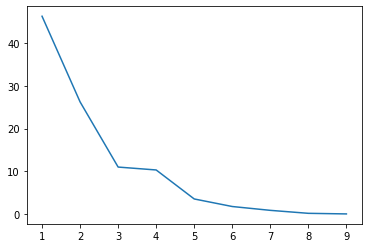

In [ ]:
_, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show()

In [ ]:
pcaData=pd.DataFrame(
    pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'class']]))
pcaNames=[]
for i in range(9):
  pcaNames.append('pc'+str(i+1))
pcaData.columns=pcaNames
pcaData.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-1.398043,-1.130825,-0.040886,-1.089397,0.090429,-0.050095,-0.067903,-0.068293,-0.001004
1,-1.434297,0.319143,-0.258955,-0.311744,-0.202934,-0.043998,0.000296,-0.041098,-0.000955
2,-1.437992,0.328063,-0.254765,0.126491,-0.030055,-0.157083,0.005590,-0.048115,-0.000210
3,-1.246376,-0.270448,0.030018,0.052542,-0.015731,0.029462,-0.099273,-0.063499,0.000028
4,-1.300887,-0.006864,-0.280442,0.299700,0.039556,0.186211,0.068602,-0.058122,-0.000481


In [ ]:
pcaData['class'] = data_fillna_mean['class'].copy()

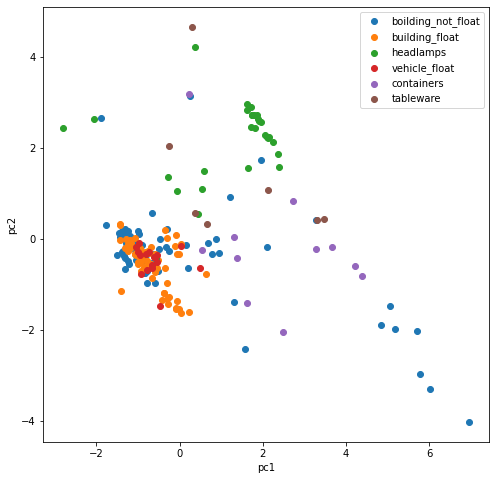

In [ ]:
col1 = 'pc1'
col2 = 'pc2'
fig, ax = plt.subplots(figsize=(8,8))
for glassType in pcaData['class'].value_counts().index.values:
  ax.scatter(pcaData[col1][ pcaData['class']==glassType ],
             pcaData[col2][ pcaData['class']==glassType ],
             label=glassType)
ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

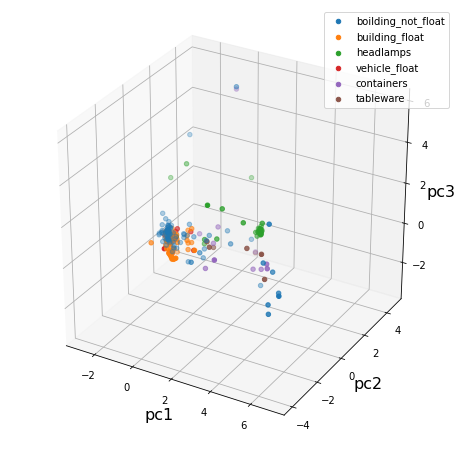

In [ ]:
col1 = 'pc1'
col2 = 'pc2'

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for glassType in pcaData['class'].value_counts().index.values:
  ax.scatter(pcaData['pc1'][ pcaData['class']==glassType ], 
             pcaData['pc2'][ pcaData['class']==glassType ], 
             pcaData['pc3'][ pcaData['class']==glassType ],
             label=glassType)

ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('pc3', fontsize=16)
ax.legend()

plt.show()

#Корреляции

In [ ]:
corr = data_fillna_mean.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.194470,-0.154989,-0.367239,-0.506469,-0.286469,0.778496,0.017864,0.161415
Na,-0.194470,1.000000,-0.264323,0.147283,-0.021057,-0.258614,-0.271952,0.294266,-0.235917
Mg,-0.154989,-0.264323,1.000000,-0.449191,-0.116531,-0.006155,-0.413616,-0.436579,0.087383
Al,-0.367239,0.147283,-0.449191,1.000000,-0.047206,0.314377,-0.232200,0.455501,-0.074701
Si,-0.506469,-0.021057,-0.116531,-0.047206,1.000000,-0.211922,-0.215806,-0.129697,-0.080667
K,-0.286469,-0.258614,-0.006155,0.314377,-0.211922,1.000000,-0.304043,-0.025736,-0.003631
Ca,0.778496,-0.271952,-0.413616,-0.232200,-0.215806,-0.304043,1.000000,-0.113922,0.121476
Ba,0.017864,0.294266,-0.436579,0.455501,-0.129697,-0.025736,-0.113922,1.000000,-0.039630
Fe,0.161415,-0.235917,0.087383,-0.074701,-0.080667,-0.003631,0.121476,-0.039630,1.000000


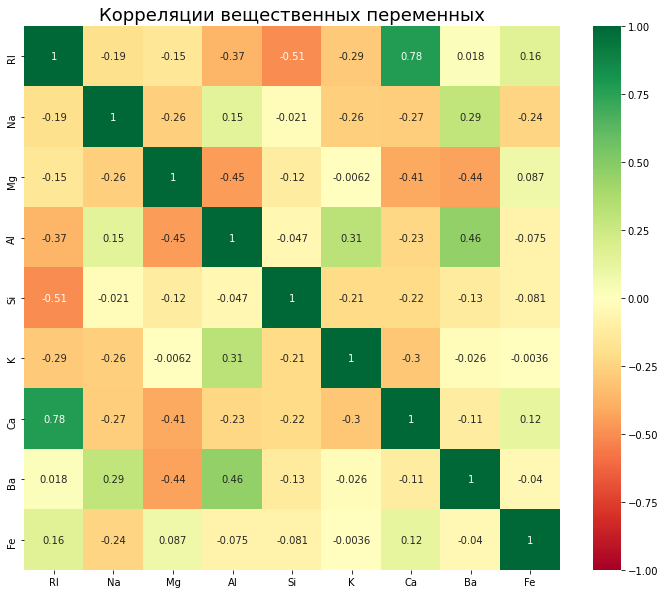

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='RdYlGn')

ax.set_title('Корреляции вещественных переменных', fontsize=18)

plt.show()

сильные корреляции (-1, -0.75) или (0.75, 1)

средние (-0.75, -0.45) или (0.45, 0.75)

слабые (-0.45, -0.25) или (0.25, 0.45)

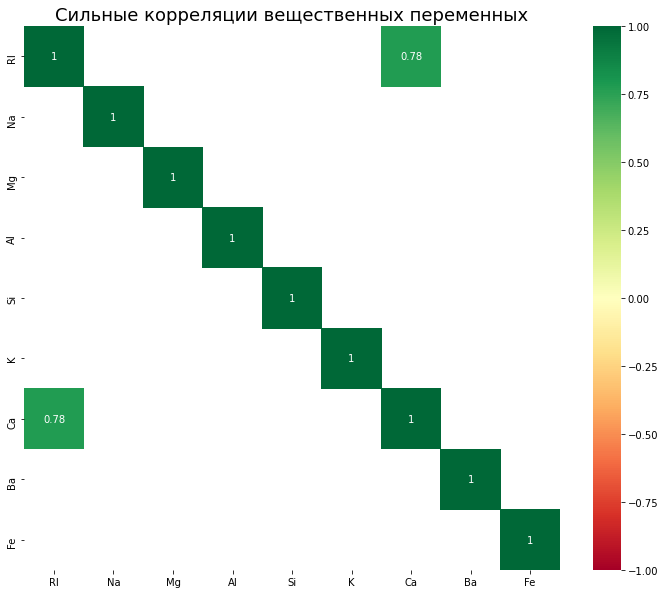

In [ ]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(corr>=0.75)|(corr<=-0.75)], annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Сильные корреляции вещественных переменных', fontsize=18)
plt.show()

#Самостоятельная работа 4

In [ ]:
data['class'].value_counts().mean()

33.833333333333336

In [ ]:
data_fillna_mean1 = data.fillna(data.mean()).copy()
data_fillna_mean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   class   203 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
data_fillna_mean1['class'].fillna(data_fillna_mean1['class'].value_counts().index[0],
                                 inplace=True)
data_fillna_mean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
forest = ExtraTreesClassifier(n_estimators=100)

In [ ]:
forest.fit(
    data_fillna_mean1[ data_fillna_mean1.columns.values[data_fillna_mean1.columns.values!='class'] ], 
    data_fillna_mean1['class']
    )

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
forest.feature_importances_

array([0.11771671, 0.10488626, 0.17054509, 0.15278046, 0.09223858,
       0.10988188, 0.11981837, 0.07667843, 0.05545422])

In [ ]:
np.sort(forest.feature_importances_, )[::-1]

array([0.17054509, 0.15278046, 0.11981837, 0.11771671, 0.10988188,
       0.10488626, 0.09223858, 0.07667843, 0.05545422])

In [ ]:
np.argsort(forest.feature_importances_, )[::-1]

array([2, 3, 6, 0, 5, 1, 4, 7, 8])

In [ ]:
importances = forest.feature_importances_
indices = np.argsort(forest.feature_importances_, )[::-1]
print("Feature ranking:")

for f in range(9):
    print("%d. feature %s (%f)" % (f + 1, data_fillna_mean1.columns.values[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature Mg (0.170545)
2. feature Al (0.152780)
3. feature Ca (0.119818)
4. feature RI (0.117717)
5. feature K (0.109882)
6. feature Na (0.104886)
7. feature Si (0.092239)
8. feature Ba (0.076678)
9. feature Fe (0.055454)


In [ ]:
std = np.std( [tree.feature_importances_ for tree in forest.estimators_], axis=0)
std

array([0.03658434, 0.04176471, 0.04078859, 0.04765514, 0.02771158,
       0.04088153, 0.03921828, 0.04396037, 0.02035475])

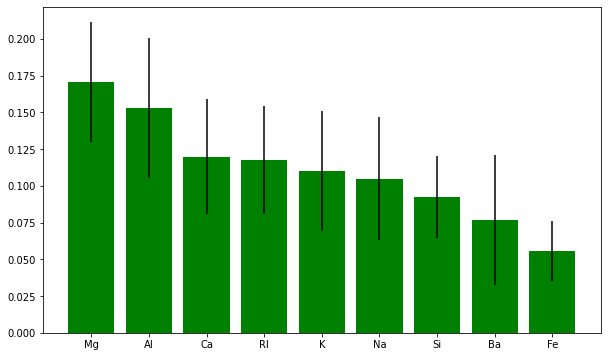

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(data_fillna_mean1.columns.values[indices], importances[indices],
       color="g", yerr=std[indices], align="center")

plt.show()

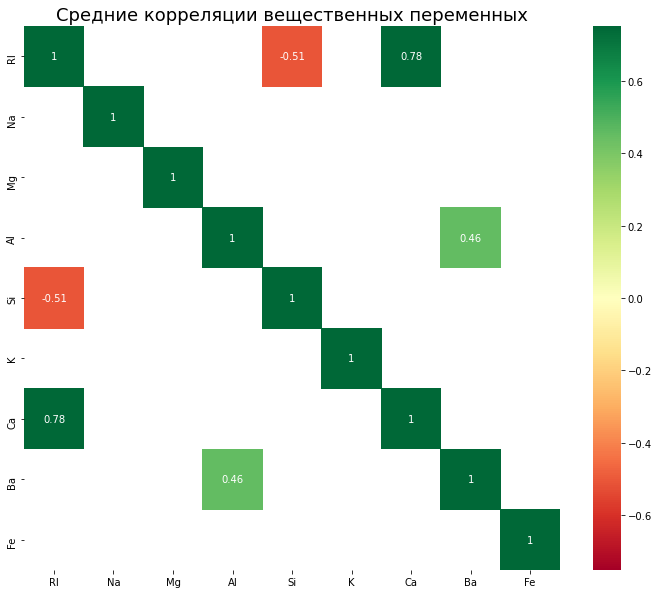

In [ ]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(corr>=0.45)|(corr<=-0.45)], annot=True, vmax=0.75, vmin=-0.75, cmap='RdYlGn')
ax.set_title('Средние корреляции вещественных переменных', fontsize=18)
plt.show()

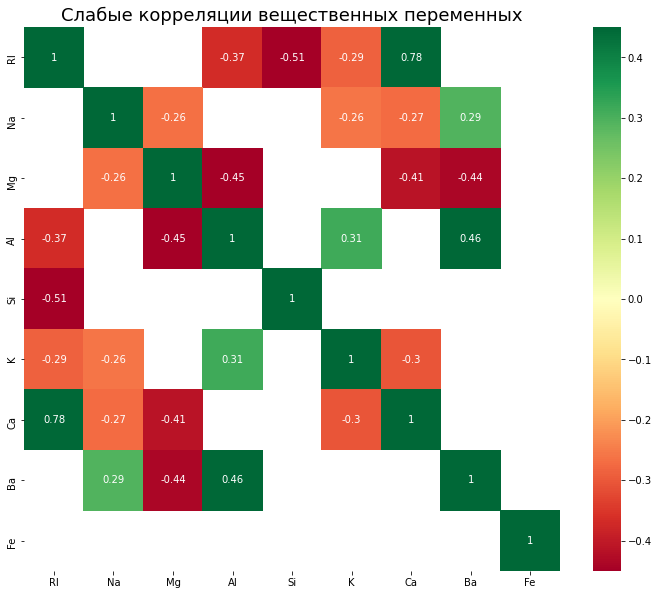

In [ ]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(corr>=0.25)|(corr<=-0.25)], annot=True, vmax=0.45, vmin=-0.45, cmap='RdYlGn')
ax.set_title('Слабые корреляции вещественных переменных', fontsize=18)
plt.show()